# **Fares Ahmed Moustafa Ahmed**
### ***F.ahmed2270@nu.edu.eg***

In [ ]:
!pip install protobuf==3.20.*
import os
os.kill(os.getpid(), 9)

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50

2025-11-17 04:19:39.101795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763353179.547165      87 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763353179.668389      87 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## ***Loading the Dataset***

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Training data:", train_images.shape)
print("Test data:", test_images.shape)

Training data: (50000, 32, 32, 3)
Test data: (10000, 32, 32, 3)


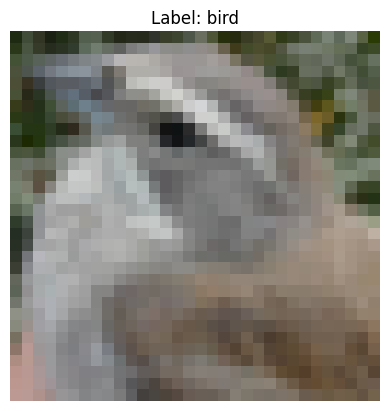

In [4]:
random_index = np.random.randint(len(train_images))

image = train_images[random_index]
label = train_labels[random_index][0]

plt.imshow(image)
plt.title(f"Label: {class_names[label]}")
plt.axis('off')
plt.show()

## ***Normalizing Images***

In [5]:
train_images_nor = train_images.astype('float32') / 255.0
test_images_nor = test_images.astype('float32') / 255.0

## ***One-Hot Encoding the Labels***

In [6]:
train_labels_cat = to_categorical(train_labels, num_classes=10)
test_labels_cat = to_categorical(test_labels, num_classes=10)

print("Original label shape:", train_labels.shape)
print("After one-hot encoding:", train_labels_cat.shape)

Original label shape: (50000, 1)
After one-hot encoding: (50000, 10)


## ***Splitting the Dataset Into Train,Validation and Test***

In [7]:
train_X, val_X, train_y, val_y = train_test_split(
    train_images_nor, train_labels_cat, test_size=0.2, random_state=42
)

print("Training set:", train_X.shape)
print("Validation set:", val_X.shape)
print("Test set:", test_images.shape)

Training set: (40000, 32, 32, 3)
Validation set: (10000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


## ***Data Augmentation***

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(train_X)

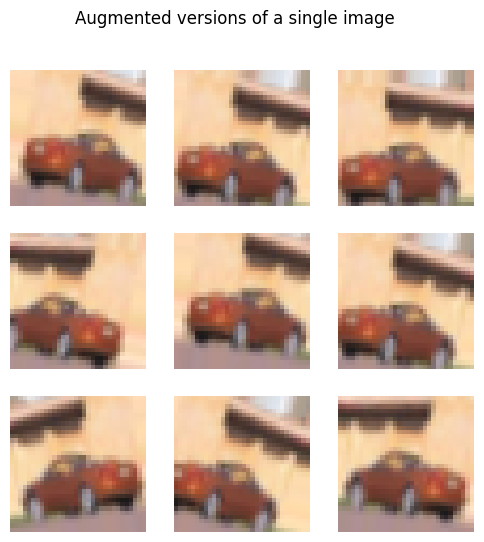

In [9]:
plt.figure(figsize=(6,6))
for i in range(9):
    augmented_img = datagen.random_transform(train_X[99]) 
    plt.subplot(3,3,i+1)
    plt.imshow(augmented_img)
    plt.axis('off')
plt.suptitle("Augmented versions of a single image")
plt.show()

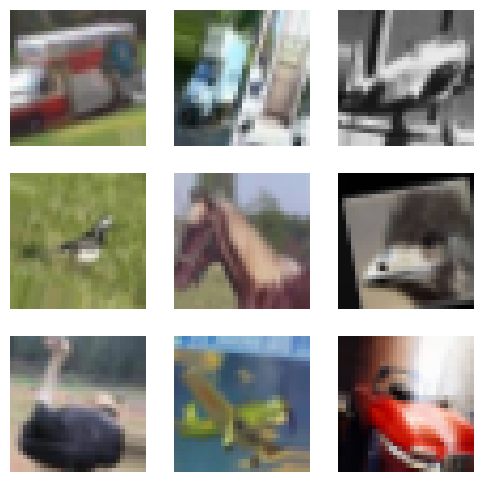

In [10]:
images, labels = next(datagen.flow(train_X, train_y, batch_size=9))

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

## ***Training Custom CNNs***

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763353266.238691      87 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1763353266.239523      87 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 423,722 (1.62 MB)

 Trainable params: 422,314 (1.61 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [12]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [13]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,     
    patience=2,    
    verbose=1
)

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
start = time.time()

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=64),
    epochs=30,
    validation_data=(val_X, val_y),
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

end = time.time()
print(f"Training time: {(end - start)/60:.2f} minutes")
print(f"Epochs completed: {len(history.history['accuracy'])}")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1763353276.825979     130 service.cc:148] XLA service 0x7cd2e0009000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763353276.827565     130 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763353276.827593     130 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763353277.711596     130 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.1046 - loss: 3.3874 

I0000 00:00:1763353285.083548     130 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.2918 - loss: 2.2788 - val_accuracy: 0.4724 - val_loss: 1.4519 - learning_rate: 0.0010
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4997 - loss: 1.4055 - val_accuracy: 0.5479 - val_loss: 1.2973 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5754 - loss: 1.1903 - val_accuracy: 0.6251 - val_loss: 1.0757 - learning_rate: 0.0010
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6247 - loss: 1.0609 - val_accuracy: 0.6704 - val_loss: 0.9833 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6602 - loss: 0.9706 - val_accuracy: 0.6854 - val_loss: 0.9076 - learning_rate: 0.0010
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6809 - loss: 0.9215 - val_accuracy: 0.7295 - val_loss: 0.7797 - learning_rate: 0.0010
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7040 - loss: 0.8500

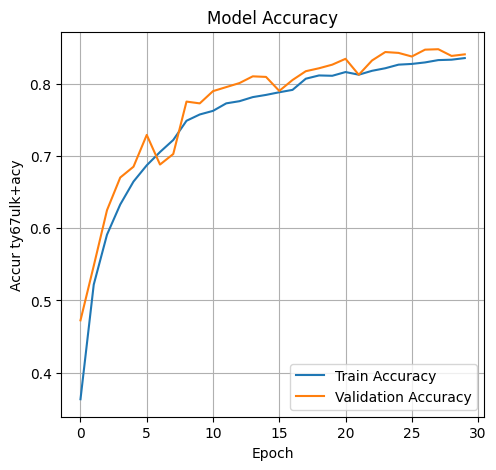

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accur ty67ulk+acy')
plt.legend()
plt.grid(True)

plt.show()

## ***ResNet50 Pretrained Model***

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

train_dataset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train
)
test_dataset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model = models.resnet50(weights="IMAGENET1K_V1")  # pretrained weights

# Replace the final fully connected layer (ImageNet=1000 → CIFAR10=10)
model.fc = nn.Linear(model.fc.in_features, 10)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)



def train_one_epoch(epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    print(f"Epoch {epoch}: Loss={running_loss/len(train_loader):.4f}, Train Acc={acc:.2f}%")



def evaluate():
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = outputs.max(1)

            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    acc = 100 * correct / total
    print(f"Test Accuracy: {acc:.2f}%")
    return acc



num_epochs = 10
for epoch in range(1, num_epochs + 1):
    train_one_epoch(epoch)
    evaluate()

Device: cuda


100%|██████████| 170M/170M [00:02<00:00, 80.6MB/s] 
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 172MB/s] 


Epoch 1: Loss=0.2954, Train Acc=90.42%
Test Accuracy: 94.01%
Epoch 2: Loss=0.1315, Train Acc=95.62%
Test Accuracy: 94.74%
Epoch 3: Loss=0.0931, Train Acc=96.82%
Test Accuracy: 94.77%
Epoch 4: Loss=0.0769, Train Acc=97.39%
Test Accuracy: 95.23%
Epoch 5: Loss=0.0599, Train Acc=98.06%
Test Accuracy: 94.59%
Epoch 6: Loss=0.0570, Train Acc=98.08%
Test Accuracy: 94.85%
Epoch 7: Loss=0.0480, Train Acc=98.42%
Test Accuracy: 94.40%
Epoch 8: Loss=0.0449, Train Acc=98.44%
Test Accuracy: 94.91%
Epoch 9: Loss=0.0440, Train Acc=98.53%
Test Accuracy: 95.19%
Epoch 10: Loss=0.0351, Train Acc=98.82%
Test Accuracy: 94.39%


In [31]:
resnet_train_acc = [90.42, 95.62, 96.82, 97.39, 98.06, 98.08, 98.42, 98.44, 98.53, 98.82]
resnet_val_acc   = [94.01, 94.74, 94.77, 95.23, 94.59, 94.85, 94.40, 94.91, 95.19, 94.39]
resnet_train_loss = [0.2954, 0.1315, 0.0931, 0.0769, 0.0599, 0.0570, 0.0480, 0.0449, 0.0440, 0.0351]

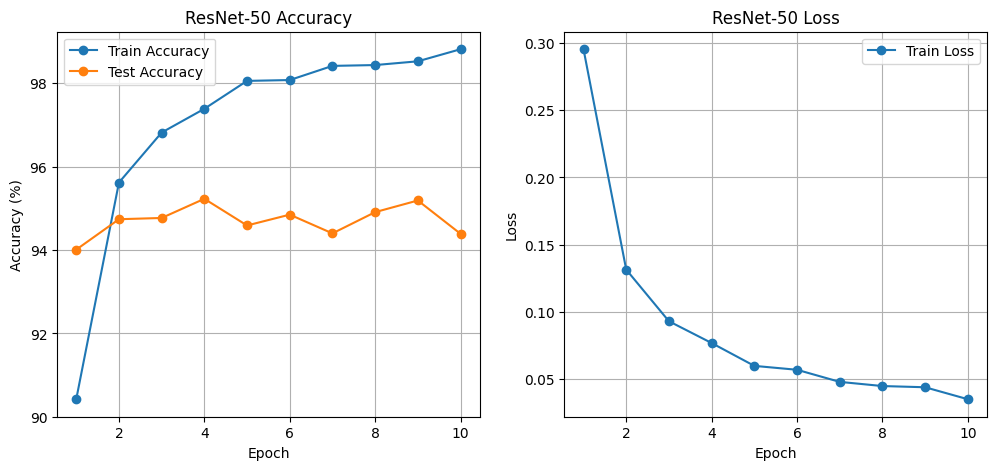

In [32]:
epochs = range(1, 11)

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(epochs, resnet_train_acc, label='Train Accuracy', marker='o')
plt.plot(epochs, resnet_val_acc, label='Test Accuracy', marker='o')
plt.title('ResNet-50 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(epochs, resnet_train_loss, label='Train Loss', marker='o')
plt.title('ResNet-50 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


## ***Comparing both Models Losses***

In [33]:
cnn_train_acc = history.history['accuracy']
cnn_val_acc   = history.history['val_accuracy']
cnn_train_loss = history.history['loss']
cnn_val_loss   = history.history['val_loss']

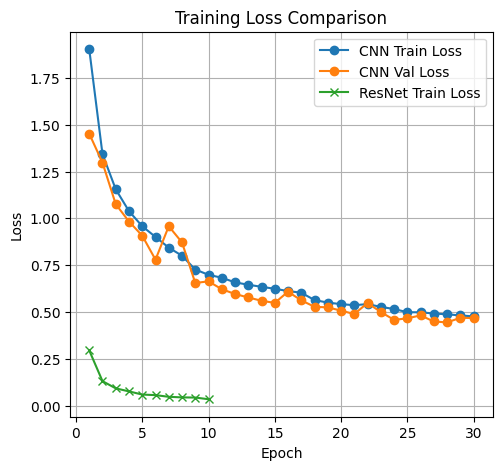

In [35]:
epochs_cnn = range(1, len(cnn_train_acc)+1)
epochs_resnet = range(1, len(resnet_train_acc)+1)

plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
plt.plot(epochs_cnn, cnn_train_loss, label='CNN Train Loss', marker='o')
plt.plot(epochs_cnn, cnn_val_loss, label='CNN Val Loss', marker='o')
plt.plot(epochs_resnet, resnet_train_loss, label='ResNet Train Loss', marker='x')
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()


## ***Discussion and Conclusion***
### **1. Transfer Learning and Pretrained CNNs**

The pretrained ResNet-50 model achieved 94.39% test accuracy, significantly higher than the custom CNN’s 84.12%. This demonstrates a key advantage of transfer learning:

- Faster convergence: ResNet-50 leveraged features learned from ImageNet, allowing the network to start from a strong initialization rather than learning all features from scratch.

- Improved accuracy: Pretrained feature representations (edges, textures, patterns, object parts) generalized well to CIFAR-10, resulting in more accurate predictions across most classes.

Overall, pretrained CNNs often require fewer epochs to reach high performance and are less sensitive to hyperparameter tuning.

### **2. Custom CNNs: Flexibility vs Training Effort**

While the custom CNN reached a respectable 84.12% accuracy, it required:

- Longer training: Learning all features from scratch naturally requires more epochs.

- Careful tuning: Architecture design, learning rate, regularization, and data augmentation heavily influence performance.

However, custom CNNs can be more flexible in scenarios such as:

- Specialized domains where pretrained weights are irrelevant (e.g., medical imaging, scientific data)

- Models with strict computational constraints requiring smaller networks

### **3. Practical Trade-Offs**
| Aspect                     | Custom CNN | Pretrained CNN (ResNet-50)                            |
| -------------------------- | ---------- | ----------------------------------------------------- |
| Final Accuracy             | 84.12%     |             94.39%                                                |
| Convergence Speed          | Slower     |             Faster                                                |
| Training Time per Epoch    | Shorter    |               Longer (deeper network)                               |
| Flexibility                | High       |        Moderate (architecture fixed, but weights pretrained) |
| Hyperparameter Sensitivity | High       |              Lower (transfer learning stabilizes training)         |
